From  [python4engineers blog.](https://pythonforundergradengineers.com/live-plotting-with-matplotlib.html)

NB For this notebook to work you must have requests and pyserial installed.

```
conda install -y requests pyserial
```

```
%matplotlib notebook
```

Executing the magic command in the next cell is optional.  See the discussion below for the trade-offs.

In [ ]:
%matplotlib notebook

Executing these matplotlibs import is not optional.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Agg')
import numpy as np
#plt.rcParams['animation.ffmpeg_path'] = 'yourhomepath/anaconda2/envs/yourenv/bin/ffmpeg' 
plt.rcParams['animation.ffmpeg_path'] = '/Users/gawron/opt/anaconda3/envs/live_plot/bin/ffmpeg' 
plt.rcParams["animation.html"] = "jshtml"

First let's look at an idea for creating a plot that  will fill one frame, frame $i$.

We first construct a dummy line object $l$ over the right interval (here it's just a straight 
line from $(0,-1)$ to  $(2\pi,1)$),
then set the data of $l$ over just the interval defined by  $i$, using the function of our choice
($\sin(t)$).

<IPython.core.display.Javascript object>


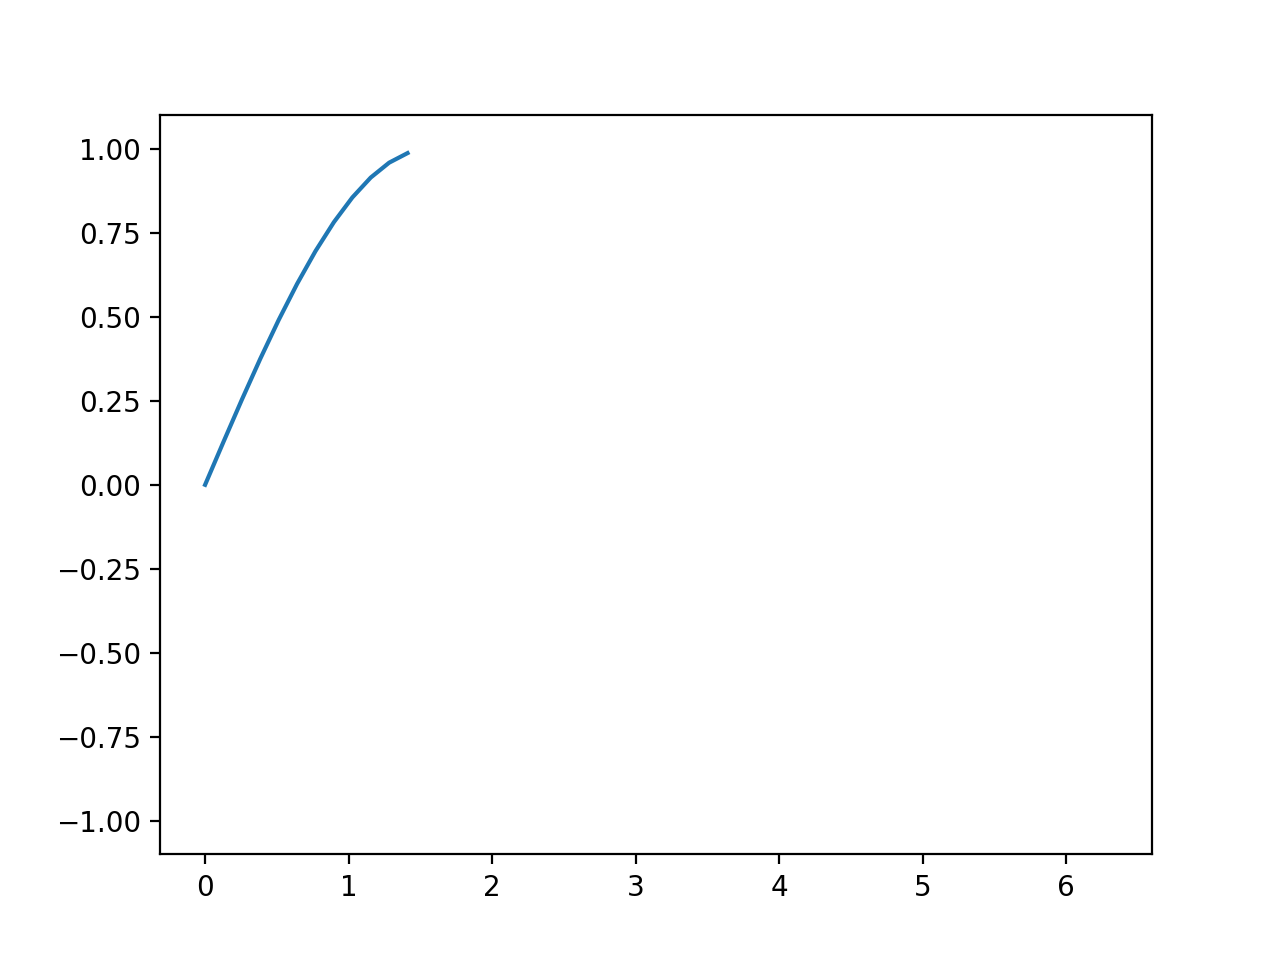

In [8]:
from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# create empty lists for the x and y data
x = []
y = []

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])
i = 12

def animate(i):
    l.set_data(t[:i], x[:i])
    return [l]

animate(12)

From blog:

"[Once o]ur `animate()` function is defined, ... we [can] call the animation. Matplotlib's `FuncAnimation` class can accept several input arguments. At a minimum, we need to pass in the figure object fig, and our animation function that draws the plot animate to the FuncAnimation class. We'll also add a `frames=` keyword argument that determines how many times the plot is re-drawn, meaning how many times the animation function is called. `interval=500` specifies the time between frames (time between animate() function calls) in milliseconds. `interval=500` means 500 milliseconds between each frame, which is half a second. `repeat=False` means that after all the frames are drawn, the animation will not repeat. Note how the `plt.show()` line is called after the FuncAnimation line.

Now we animate using the `set_data` idea illustrated in the previous plot.

<IPython.core.display.Javascript object>


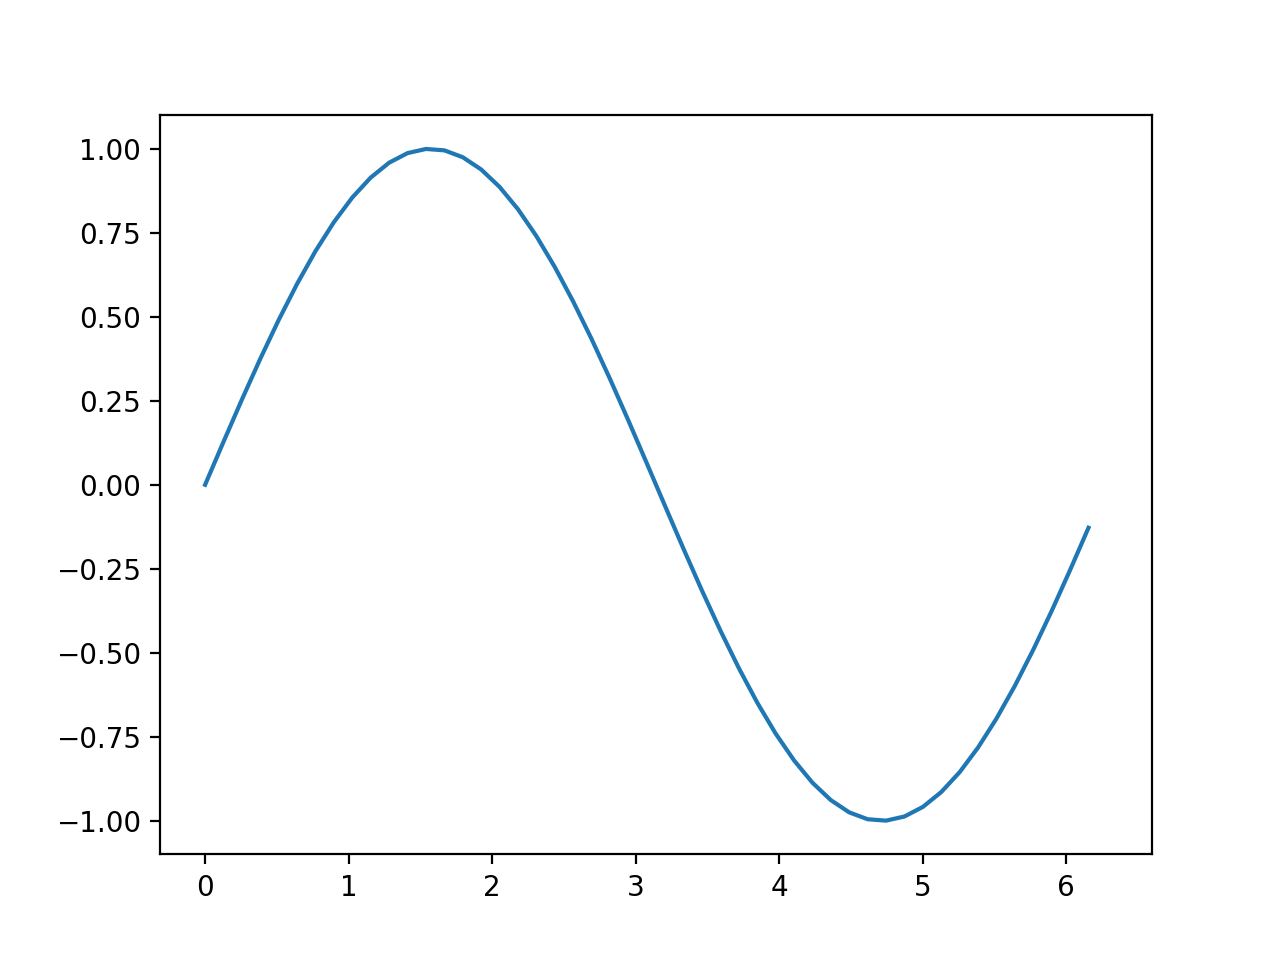

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

write_file= False

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

frame_data = lambda i: l.set_data(t[:i], x[:i])

# `repeat=True` not good; it can only be stopped with a kernel restart.
ani = matplotlib.animation.FuncAnimation(fig, frame_data, frames=len(t),interval=50, repeat=False)


if write_file:
    # This save works but Quick Time cant play it.
    # However Elmedia, a player available in the Mac App store for free, can play it.
    ani.save('sin_wave.mpg')

In [27]:
import os.path
os.getcwd()

'/Users/gawron/Desktop/src/sphinx/python_for_ss_extras/colab_notebooks/python-for-social-science/visualization'

####  Comments on the code above.

For writing an output file (line 24), know your output directory:

In [41]:
import os.path
os.getcwd()

'/Users/gawron/Desktop/src/sphinx/python_for_ss_extras/colab_notebooks/python-for-social-science/visualization'

To find available movie writers:

```
import matplotlib.animation as manimation
print(manimation.writers.list())
```

In my current version the writers are:

```
['pillow', 'ffmpeg', 'ffmpeg_file', 'html']
```

To use a non default writer do something along these lines:

```
writer = manimation.FFMpegFileWriter()
# Choose an extension appropriate for the writer 
ani.save('foo2.mpg',writer=writer)
```

If circumventing the default movie player for your OS, you may have to
open the the desired Player and open the saved the file from
the File > Open menu.

Not sure how init_func param is used

```
init_func= lambda: draw_a_frame2(1)
```

didn't seem to have an effect.

To run the entire animation at a reasonable speed set interval between frames to 100 ms.

```
ani = FuncAnimation(fig, frame_data, frames=len(x), interval=100, repeat=False)
```

```
frames=20
```

will animate the first 20 frames of data,

HTML(ani.to_html5_video())

####  The stutter bug

The  cell executed above animates inline, but it has a bug.

The first few frames of the animation "stutter"
with an non-sequenced image.

However, there's a workaround.

The `ani` object created ine Line 18 knows how to display itself, and in this mode (click the right triangle
"RUN" button in  the output cell), the initial stuttering is gone.

In [6]:
ani

#### Using inline animation (as opposed to the ani object)

The animation cell code that calls `matplotlib.animation.FuncAnimation`
does what we'll call **inline animation**.  The animation runs
as the cell is executed.  The cell in which we evaluated the `ani` object
does not do inline animation. It requires you to press the
`Run` button to start the animation.

Whether inline animation works depends in part on what backend is being used.
Executing the magic command 

```
%matplotlib notebook
```

starts up the notebook backend.  

The notebook  and osx backends are known to work with inline animation;  
agg, gtk4, inline,  and svg are known to not work with inline animation.

Since the recommended mode of operation is not to use inline
animation, but to create an animation object and evaluate it as demoed in the last section
of this NB, the choice of backend is not really important.  The recommended
option is to avoid a backend that gives you inline animation,
but it's not terrible if you ignore that recommendation.  It
just gives you the initial stutter bug described above.

Note: Must restart kernel for each experiment with a different backend.

In [11]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


Another equivalent way to code the animation.  Whether the stutter bug shows
still depends on which backend you're using.

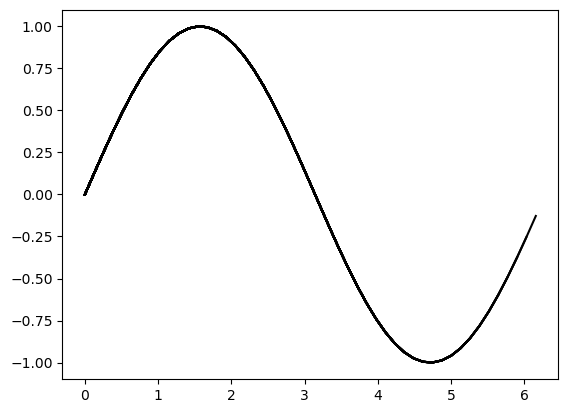

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation


def my_plot(i,ax):
    """
    Add fixed color to keep mpl from changing the line color every
    frame, because the same axis is being drawn to
    """
    p0, = ax.plot(t[:i], x[:i],color="k")
    return [p0]   # return a list of the new plots

t = np.linspace(0,2*np.pi)
#x = np.abs(t-1.5)
x = np.sin(t)

fig = plt.figure()
ax = fig.add_subplot(111)  # fig and axes created once

ims = [my_plot(i,ax) for i in range(len(t))]
ani = animation.ArtistAnimation(fig, ims, interval=50, repeat=False)

# You can evaluate ani as the last line but it's confusing because you get two outputs
# So not recommended.
#ani

# Unnecessary since tha ani object knows how to display itself.
#from IPython.display import HTML
#HTML(ani.to_html5_video())

#Optional Either works
#ani.save('im.html', metadata={'artist':'plot'}, writer="html")
#ani.save('im.mpg', metadata={'artist':'plot'}, writer="ffmpeg")

##  Recommended mode of operation

Restart this notebook and re-execute the cell with all the matplotlib imports
without including the `%matplotlib notebook`  magic command.

Then rerun the cell
above (you will get only a single frozen image of the plot as output). 
But you will have successully created an animation object named
`ani`.

Then run the next cell and click on the "Run" button in the output to get your animation, stutter-free.

In [3]:
ani